In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


            Price
Date             
2018-01-02  43.06
2018-01-03  43.06
2018-01-04  43.26
2018-01-05  43.75
2018-01-08  43.59


In [10]:
# 2.  chia train test theo tỉ lệ 9:1
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]



In [11]:

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5975.970, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5974.184, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5972.097, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5971.812, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5974.729, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5972.109, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5972.390, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5973.972, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5972.671, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.866 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [12]:

y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))



In [13]:

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[173.21770968 173.31447951 173.41124935 173.50801918 173.60478901
 173.70155884 173.79832867 173.89509851 173.99186834 174.08863817
 174.185408   174.28217783 174.37894767 174.4757175  174.57248733
 174.66925716 174.76602699 174.86279683 174.95956666 175.05633649
 175.15310632 175.24987615 175.34664599 175.44341582 175.54018565
 175.63695548 175.73372531 175.83049515 175.92726498 176.02403481]


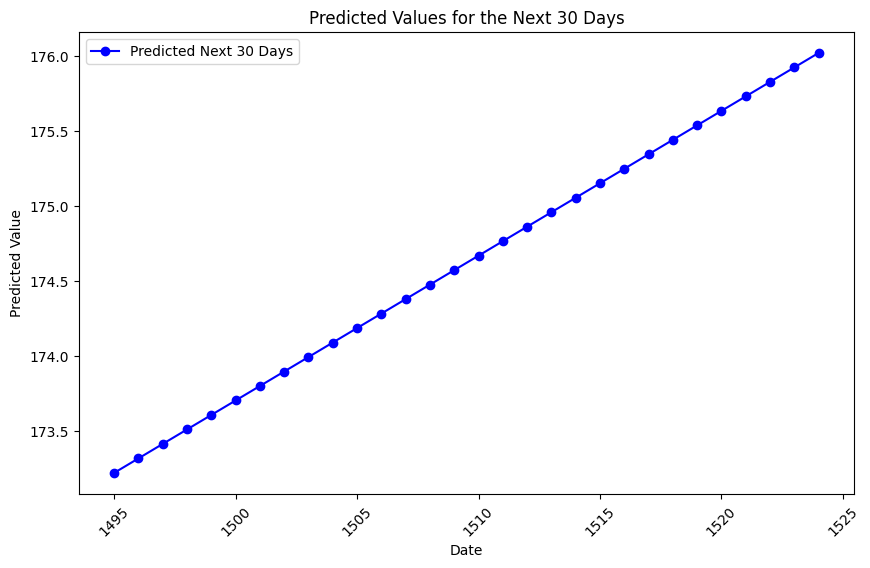

In [14]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 8.59673509683978
Testing MAPE: 0.03820086236892994
Testing MAE: 6.998560727448584


Testing RMSE: 8.59673509683978
Testing MAPE: 0.03820086236892994
Testing MAE: 6.998560727448584


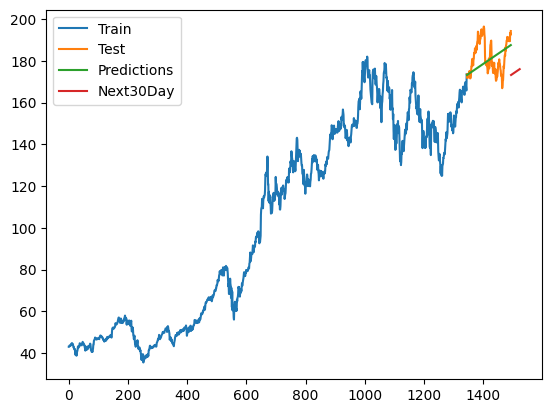

In [16]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [17]:
test_data.index

RangeIndex(start=1345, stop=1494, step=1)